In [1]:
import pandas as pd

data = pd.read_csv('../SBER_news_in_crashed.csv')
data = data.drop_duplicates(subset='date', keep='first')
import re

# Define the list of special characters to remove
special_characters = ['[', ']', '\'', '\\xa', '\\n', '•']

# Iterate over each special character and replace it with an empty string
for char in special_characters:
    data['filtered_content'] = data['filtered_content'].str.replace(re.escape(char), ' ')

# Optionally, you can remove any extra spaces resulting from the replacements
data['filtered_content'] = data['filtered_content'].str.strip()
data.dropna(subset='filtered_content',inplace=True)
content = pd.read_csv('SBER_with_sentiments_full.csv')
titles = pd.read_csv('SBER_with_sentiments_titles_full.csv')
titles.columns = ['Title',	'En Title', 'Positive title',	'Negative title',	'Neutral title', 'real_score_title']
news_sentimented = pd.merge(data, content, left_on = 'filtered_content', right_on = 'Headline', how='inner')
news_sentimented = pd.merge(news_sentimented, titles, left_on = 'title', right_on = 'Title', how='inner')
news_sentimented.drop_duplicates(subset='date')


/tmp/ipykernel_58212/4082674276.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['filtered_content'] = data['filtered_content'].str.replace(re.escape(char), ' ')


,date,title,content,filtered_content,Headline,En Headline,Positive,Negative,Neutral,real_score,Title,En Title,Positive title,Negative title,Neutral title,real_score_title
0,2024-01-17,5 идей в российских акциях. Отмечаем перспекти...,Эксперты БКС Экспресс выделили главные тренды ...,Просто и понятно Акции Сбербанка остаются одно...,Просто и понятно Акции Сбербанка остаются одно...,It is simple and understandable that the Sberb...,0.114936,0.039187,0.845877,0.075749,5 идей в российских акциях. Отмечаем перспекти...,Five ideas in Russian action.,0.063590,0.024636,0.911774,0.038953
1,2024-01-16,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...","On Friday, Sberbank's stock increased by 0.05%...",0.950123,0.017463,0.032414,0.932660,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Sberbank – Slowed down, but short-term trend i...",0.951477,0.021793,0.026730,0.929684
2,2024-01-12,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...","Sberbank's stock on Thursday was 0.44%, up to ...",0.814230,0.019795,0.165974,0.794435,Сбербанк. Пока не расторговались,"Sberbank, until the deal's settled.",0.032759,0.014660,0.952580,0.018099
3,2024-01-11,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...","Sberbank's stock on Wednesday is 0.29%, up to ...",0.133026,0.839245,0.027729,-0.706220,Сбербанк. Может протестировать 200-часовую сре...,"Sberbank, can test the 200-hour average.",0.160286,0.009753,0.829961,0.150533
4,2024-01-10,Фавориты стратегии 2024: рост до 12%,После выхода стратегии аналитиков БКС на 2024 ...,Долгосрочные фавориты 0— потенциал роста сохра...,Долгосрочные фавориты 0— потенциал роста сохра...,Long-term provorites 0 — growth potentials ret...,0.903742,0.008750,0.087508,0.894992,Фавориты стратегии 2024: рост до 12%,Policy frameworks 2024: up to 12%,0.093634,0.010952,0.895414,0.082682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2019-03-19,Сбербанк. Пробит локальный нисходящий тренд,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии акц...,Итоги торгов На предыдущей торговой сессии акц...,"At the previous trade session, Sberbank's shar...",0.469381,0.417424,0.113195,0.051956,Сбербанк. Пробит локальный нисходящий тренд,It's a local downward trend.,0.009367,0.955859,0.034774,-0.946492
1607,2019-03-18,Сбербанк. Новый подъем от 200-дневной средней,Акции Сбербанка дорожают на процент в ходе тор...,Акции Сбербанка дорожают на 0процент в 0ходе т...,Акции Сбербанка дорожают на 0процент в 0ходе т...,The Sberbank stock is valued at 0 per cent on ...,0.057830,0.020637,0.921533,0.037193,Сбербанк. Новый подъем от 200-дневной средней,A new rise from the 200-day average,0.932965,0.018382,0.048653,0.914583
1608,2019-03-15,Сбербанк. Сегодня можем протестировать поддерж...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...,Итоги торгов В предыдущий торговый день акции ...,"On the previous day of trading, Sberbank's sha...",0.010920,0.969912,0.019168,-0.958992,Сбербанк. Сегодня можем протестировать поддерж...,"Sberbank, we can test 202 rubles today.",0.134755,0.009607,0.855638,0.125148
1609,2019-03-14,Сбербанк. На младших таймфреймах появились при...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...,Итоги торгов В предыдущий торговый день акции ...,"On the previous day of trading, the Sberbank s...",0.843688,0.103579,0.052733,0.740109,Сбербанк. На младших таймфреймах появились при...,There are signs of strength on the junior time...,0.932515,

In [2]:
content = pd.read_csv('SBER_with_sentiments_full.csv')
content

,Headline,En Headline,Positive,Negative,Neutral,real_score
0,Просто и понятно Акции Сбербанка остаются одно...,It is simple and understandable that the Sberb...,0.114936,0.039187,0.845877,0.075749
1,"Акции Сбербанка в пятницу подорожали на 0,05%,...","On Friday, Sberbank's stock increased by 0.05%...",0.950123,0.017463,0.032414,0.932660
2,"Акции Сбербанка в четверг подорожали на 0,44%,...","Sberbank's stock on Thursday was 0.44%, up to ...",0.814230,0.019795,0.165974,0.794435
3,"Акции Сбербанка в среду подешевели на 0,29%, д...","Sberbank's stock on Wednesday is 0.29%, up to ...",0.133026,0.839245,0.027729,-0.706220
4,Долгосрочные фавориты 0— потенциал роста сохра...,Long-term provorites 0 — growth potentials ret...,0.903742,0.008750,0.087508,0.894992
...,...,...,...,...,...,...
1216,Итоги торгов На предыдущей торговой сессии акц...,"At the previous trade session, Sberbank's shar...",0.469381,0.417424,0.113195,0.051956
1217,Акции Сбербанка дорожают на 0процент в 0ходе т...,The Sberbank stock is valued at 0 per cent on ...,0.057830,0.020637,0.921533,0.037193
1218,Итоги торгов В предыдущий торговый день акции ...,"On the previous day of trading, Sberbank's sha...",0.010920,0.969912,0.019168,-0.958992
1219,Итоги торгов В предыдущий торговый день акции ...,"On the previous day of trading, the Sberbank s...",0.843688,0.103579,0.052733,0.740109


In [3]:
titles = pd.read_csv('SBER_with_sentiments_titles_full.csv')
titles.columns = ['Title',	'En Title', 'Positive title',	'Negative title',	'Neutral title', 'real_score_title']
titles

,Title,En Title,Positive title,Negative title,Neutral title,real_score_title
0,5 идей в российских акциях. Отмечаем перспекти...,Five ideas in Russian action.,0.063590,0.024636,0.911774,0.038953
1,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Sberbank – Slowed down, but short-term trend i...",0.951477,0.021793,0.026730,0.929684
2,Сбербанк. Пока не расторговались,"Sberbank, until the deal's settled.",0.032759,0.014660,0.952580,0.018099
3,Сбербанк. Может протестировать 200-часовую сре...,"Sberbank, can test the 200-hour average.",0.160286,0.009753,0.829961,0.150533
4,Фавориты стратегии 2024: рост до 12%,Policy frameworks 2024: up to 12%,0.093634,0.010952,0.895414,0.082682
...,...,...,...,...,...,...
1216,Сбербанк. Пробит локальный нисходящий тренд,It's a local downward trend.,0.009367,0.955859,0.034774,-0.946492
1217,Сбербанк. Новый подъем от 200-дневной средней,A new rise from the 200-day average,0.932965,0.018382,0.048653,0.914583
1218,Сбербанк. Сегодня можем протестировать поддерж...,"Sberbank, we can test 202 rubles today.",0.134755,0.009607,0.855638,0.125148
1219,Сбербанк. На младших таймфреймах появились при...,There are signs of strength on the junior time...,0.932515,0.017982,0.049503,0.914532


In [4]:
news_sentimented = pd.merge(data, content, left_on = 'filtered_content', right_on = 'Headline', how='inner')
news_sentimented = pd.merge(news_sentimented, titles, left_on = 'title', right_on = 'Title', how='inner')
news_sentimented.drop_duplicates(subset='date')

,date,title,content,filtered_content,Headline,En Headline,Positive,Negative,Neutral,real_score,Title,En Title,Positive title,Negative title,Neutral title,real_score_title
0,2024-01-17,5 идей в российских акциях. Отмечаем перспекти...,Эксперты БКС Экспресс выделили главные тренды ...,Просто и понятно Акции Сбербанка остаются одно...,Просто и понятно Акции Сбербанка остаются одно...,It is simple and understandable that the Sberb...,0.114936,0.039187,0.845877,0.075749,5 идей в российских акциях. Отмечаем перспекти...,Five ideas in Russian action.,0.063590,0.024636,0.911774,0.038953
1,2024-01-16,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...","Акции Сбербанка в пятницу подорожали на 0,05%,...","On Friday, Sberbank's stock increased by 0.05%...",0.950123,0.017463,0.032414,0.932660,"Сбербанк. Сбавили темпы, но краткосрочный трен...","Sberbank – Slowed down, but short-term trend i...",0.951477,0.021793,0.026730,0.929684
2,2024-01-12,Сбербанк. Пока не расторговались,"Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...","Акции Сбербанка в четверг подорожали на 0,44%,...","Sberbank's stock on Thursday was 0.44%, up to ...",0.814230,0.019795,0.165974,0.794435,Сбербанк. Пока не расторговались,"Sberbank, until the deal's settled.",0.032759,0.014660,0.952580,0.018099
3,2024-01-11,Сбербанк. Может протестировать 200-часовую сре...,"Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...","Акции Сбербанка в среду подешевели на 0,29%, д...","Sberbank's stock on Wednesday is 0.29%, up to ...",0.133026,0.839245,0.027729,-0.706220,Сбербанк. Может протестировать 200-часовую сре...,"Sberbank, can test the 200-hour average.",0.160286,0.009753,0.829961,0.150533
4,2024-01-10,Фавориты стратегии 2024: рост до 12%,После выхода стратегии аналитиков БКС на 2024 ...,Долгосрочные фавориты 0— потенциал роста сохра...,Долгосрочные фавориты 0— потенциал роста сохра...,Long-term provorites 0 — growth potentials ret...,0.903742,0.008750,0.087508,0.894992,Фавориты стратегии 2024: рост до 12%,Policy frameworks 2024: up to 12%,0.093634,0.010952,0.895414,0.082682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2019-03-19,Сбербанк. Пробит локальный нисходящий тренд,Итоги торгов\nНа предыдущей торговой сессии ак...,Итоги торгов На предыдущей торговой сессии акц...,Итоги торгов На предыдущей торговой сессии акц...,"At the previous trade session, Sberbank's shar...",0.469381,0.417424,0.113195,0.051956,Сбербанк. Пробит локальный нисходящий тренд,It's a local downward trend.,0.009367,0.955859,0.034774,-0.946492
1607,2019-03-18,Сбербанк. Новый подъем от 200-дневной средней,Акции Сбербанка дорожают на процент в ходе тор...,Акции Сбербанка дорожают на 0процент в 0ходе т...,Акции Сбербанка дорожают на 0процент в 0ходе т...,The Sberbank stock is valued at 0 per cent on ...,0.057830,0.020637,0.921533,0.037193,Сбербанк. Новый подъем от 200-дневной средней,A new rise from the 200-day average,0.932965,0.018382,0.048653,0.914583
1608,2019-03-15,Сбербанк. Сегодня можем протестировать поддерж...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...,Итоги торгов В предыдущий торговый день акции ...,"On the previous day of trading, Sberbank's sha...",0.010920,0.969912,0.019168,-0.958992,Сбербанк. Сегодня можем протестировать поддерж...,"Sberbank, we can test 202 rubles today.",0.134755,0.009607,0.855638,0.125148
1609,2019-03-14,Сбербанк. На младших таймфреймах появились при...,Итоги торгов\nВ предыдущий торговый день акции...,Итоги торгов В предыдущий торговый день акции ...,Итоги торгов В предыдущий торговый день акции ...,"On the previous day of trading, the Sberbank s...",0.843688,0.103579,0.052733,0.740109,Сбербанк. На младших таймфреймах появились при...,There are signs of strength on the junior time...,0.932515,

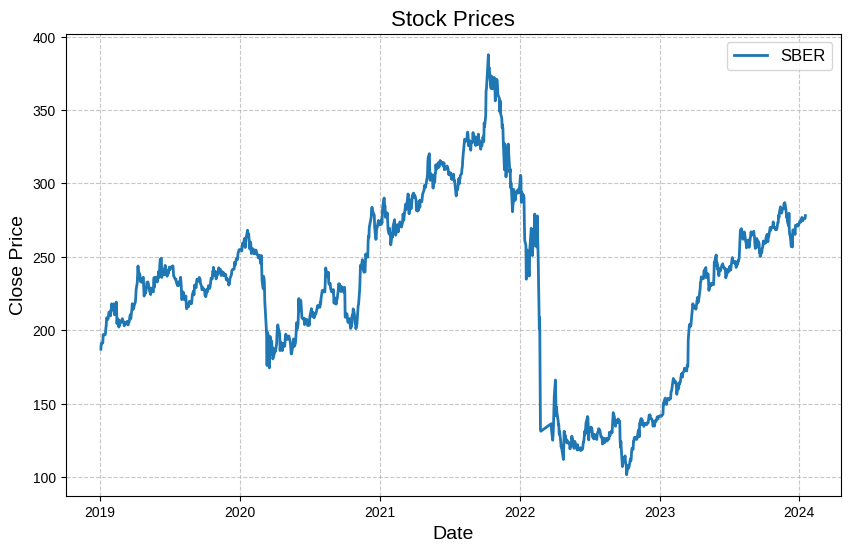

,ticker,per,date,time,open,high,low,close,vol
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650
...,...,...,...,...,...,...,...,...,...
1251,SBER,D,2024-01-11,0,274.62,275.97,274.01,275.71,19520470
1252,SBER,D,2024-01-12,0,275.90,276.96,274.77,275.84,17608350
1253,SBER,D,2024-01-15,0,276.30,277.73,275.21,275.96,21283290
1254,SBER,D,2024-01-16,0,276.24,276.45,274.10,276.01,16084140


In [5]:
from stocks_parser import StockParser

stock_parser = StockParser(['SBER'],start_date = '2019-02-01', end_date = '2024-01-17')
stock_parser.parse_stocks()
stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()
stock_data=stock_data['SBER']
stock_data = stock_data.drop_duplicates(subset='date', keep='last')
stock_data

In [6]:
news_sentimented['date'] = pd.to_datetime(news_sentimented['date'])
ready_data = pd.merge(stock_data, news_sentimented, on= 'date', how='inner')
ready_data.drop_duplicates(inplace=True)
ready_data = ready_data[['vol','real_score','real_score_title','close']]
ready_data

,vol,real_score,real_score_title,close
0,28504220,0.220851,-0.049649,206.00
1,43825330,0.740109,0.914532,203.66
2,35811130,-0.958992,0.125148,203.55
3,40789510,0.037193,0.914583,205.90
4,47705420,0.051956,-0.946492,207.70
...,...,...,...,...
1583,20618950,0.894992,0.082682,274.49
1584,19520470,-0.706220,0.150533,275.71
1585,17608350,0.794435,0.018099,275.84
1586,16084140,0.932660,0.929684,276.01


In [7]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 1587
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vol               1213 non-null   int64  
 1   real_score        1213 non-null   float64
 2   real_score_title  1213 non-null   float64
 3   close             1213 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 47.4 KB


In [8]:
len(ready_data)

1213

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.optimizers import Adam


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ready_data)

# Create sequences with a loopback of 30
loopback = 30
x, y = [], []

for i in range(loopback, len(ready_data)):
    x.append(scaled_data[i - loopback:i, :])
    y.append(scaled_data[i, 3])  # 6 corresponds to the index of 'close'

x, y = np.array(x), np.array(y)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)



2024-01-28 19:33:55.439548: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-28 19:33:55.474813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 19:33:55.474840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 19:33:55.475596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 19:33:55.480182: I tensorflow/core/platform/cpu_feature_guar

In [10]:
x_train.shape

(946, 30, 4)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=1))

custom_lr = 0.001  # Set your desired learning rate
optimizer = Adam(learning_rate=custom_lr)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=6, validation_data=(x_test, y_test), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
158/158 [==============================] - 3s 11ms/step - loss: 0.0098 - val_loss: 0.0012
Epoch 2/100
158/158 [==============================] - 1s 8ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/100
158/158 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 9.6111e-04
Epoch 4/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 5.4560e-04
Epoch 6/100
158/158 [==============================] - 1s 9ms/step - loss: 9.0738e-04 - val_loss: 5.1273e-04
Epoch 7/100
158/158 [==============================] - 1s 9ms/step - loss: 7.7942e-04 - val_loss: 0.0011
Epoch 8/100
158/158 [==============================] - 2s 11ms/step - loss: 9.2224e-04 - val_loss: 5.6521e-04
Epoch 9/100
129/158 [=======================>......] - ETA: 0s - loss: 6.7464e-04

KeyboardInterrupt: 

In [ ]:
import math

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

train_predictions = scaler.inverse_transform(np.concatenate((np.zeros((train_predictions.shape[0], data.shape[1]-1)), train_predictions), axis=1))[:, 3]
test_predictions = scaler.inverse_transform(np.concatenate((np.zeros((test_predictions.shape[0], data.shape[1]-1)), test_predictions), axis=1))[:, 3]

y_train_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_train.shape[0], data.shape[1]-1)), y_train.reshape(-1, 1)), axis=1))[:, 3]
y_test_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], data.shape[1]-1)), y_test.reshape(-1, 1)), axis=1))[:, 3]

mse_train = math.sqrt(mean_squared_error(y_train_actual, train_predictions))
mse_test = math.sqrt(mean_squared_error(y_test_actual, test_predictions))

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Testing Set: {mse_test}')

8/8 [==============================] - 0s 5ms/step
Mean Squared Error on Training Set: 5.8217953694060025
Mean Squared Error on Testing Set: 4.582346176554425


In [ ]:
lstm_layer_weights = model.layers[0].get_weights()[0]  

feature_importance_scores = np.mean(np.abs(lstm_layer_weights), axis=1)

feature_importance_scores /= np.sum(feature_importance_scores)

print("Feature Importance Scores:")
for feature, score in zip(ready_data.columns[:-1], feature_importance_scores):
    print(f"{feature}: {score}")


Feature Importance Scores:
vol: 0.3154819905757904
real_score: 0.20802472531795502
real_score_title: 0.2205081731081009


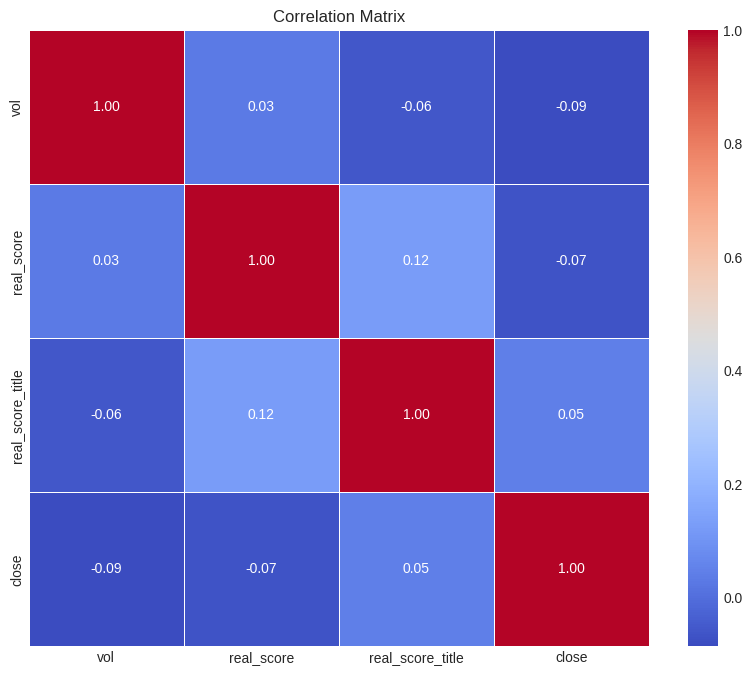

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ready_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


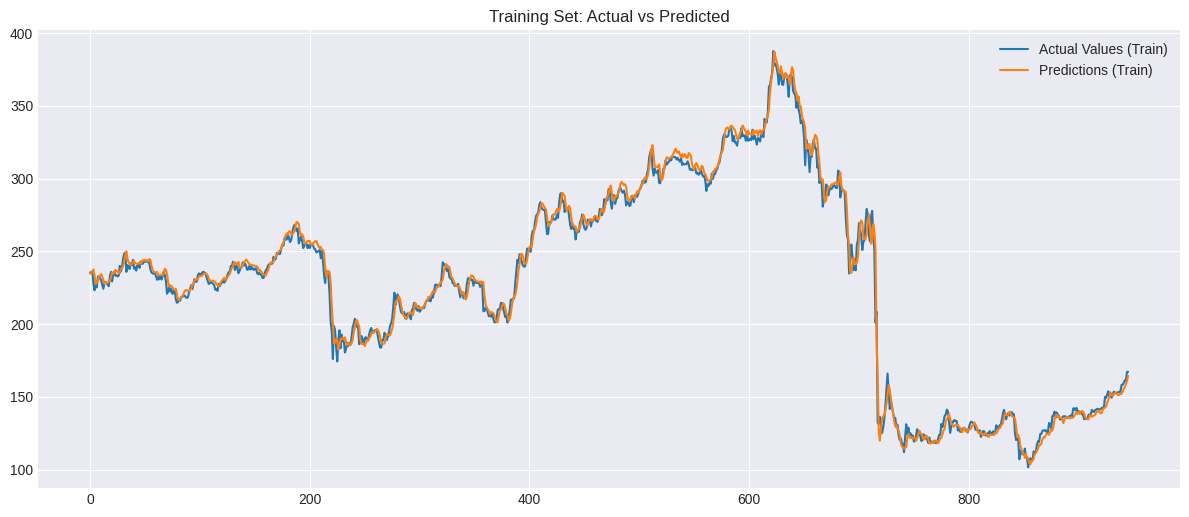

In [ ]:
# Plot the predictions vs actual values
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(y_train_actual, label='Actual Values (Train)')
plt.plot(train_predictions, label='Predictions (Train)')
plt.title('Training Set: Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()



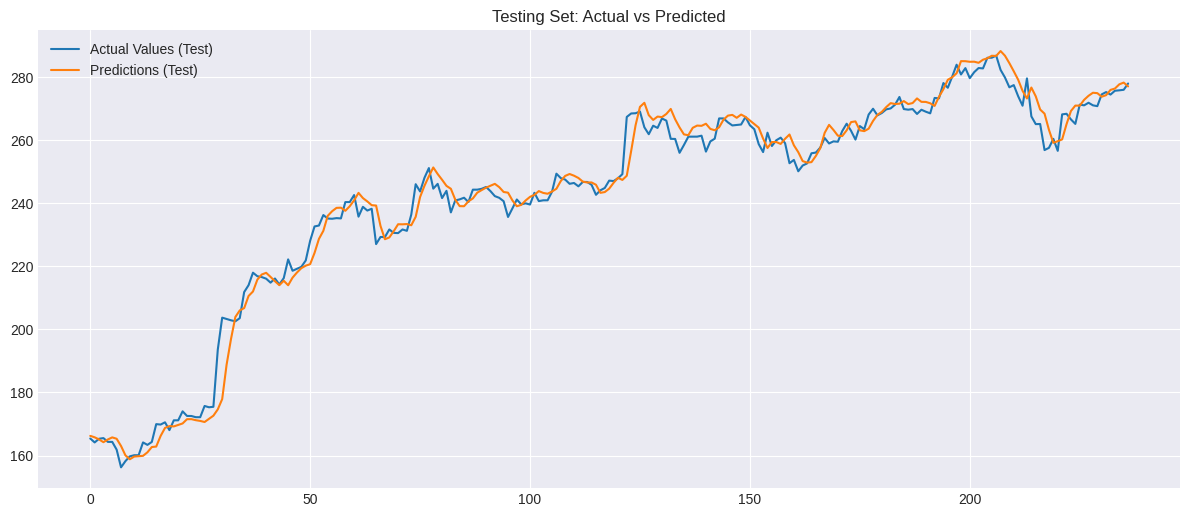

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 2)
plt.plot(y_test_actual, label='Actual Values (Test)')
plt.plot(test_predictions, label='Predictions (Test)')
plt.title('Testing Set: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()